# Dividir el dataset en conjunto de entrenamiento y de testing


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("../datasets/ads/Advertising.csv")

In [3]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
a = np.random.randn(len(data))

(array([ 2.,  7., 24., 53., 38., 41., 18., 12.,  2.,  3.]),
 array([-2.6509792 , -2.07493026, -1.49888132, -0.92283238, -0.34678344,
         0.2292655 ,  0.80531444,  1.38136338,  1.95741233,  2.53346127,
         3.10951021]),
 <BarContainer object of 10 artists>)

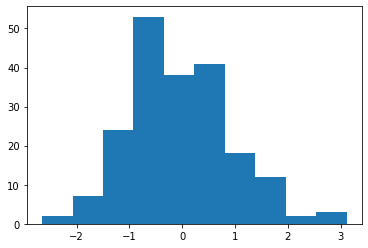

In [5]:
plt.hist(a)

In [6]:
check = (a<0.8)
training = data[check]
testing = data[~check]

In [7]:
len(training), len(testing)

(165, 35)

In [8]:
import statsmodels.formula.api as smf
lm = smf.ols(formula="Sales~TV+Radio",data=training).fit()

In [9]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     753.3
Date:                Tue, 23 Feb 2021   Prob (F-statistic):           9.14e-83
Time:                        22:13:08   Log-Likelihood:                -309.16
No. Observations:                 165   AIC:                             624.3
Df Residuals:                     162   BIC:                             633.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.8206      0.316      8.918      0.000       2.196       3.445
TV             0.0452      0.001     31.364      0.000       0.042       0.048
Radio          0.1929      0.008     22.954      0.000       0.176       0.210
==============================================================================
Omnibus:                       15.249   Durbin-Watson:                   2.215
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               16.762
Skew:                          -0.765   Prob(JB):                     0.000229
Kurtosis:                       3.308   Cond. No.                         443.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

sales = 3.2208+0.0438TV+0.1911Radio

## Validacion del modelo con el comjunto de testing

In [10]:
sales_pred = lm.predict(testing)
sales_pred

4      13.078835
6      11.748524
15     20.858082
19     14.091584
22      6.485056
24      8.068351
27     16.898265
28     19.298096
32      7.504762
38      9.920578
53     19.989958
58     21.920932
60      5.625412
75     12.015812
88     11.732696
104    20.207936
123    15.061782
127     6.446743
129     7.830517
130    10.492344
137    20.771179
139    19.650208
143     8.649647
144    10.025524
152    16.250047
157     9.844388
159    12.325141
160    14.111958
164    10.955707
168    17.112720
169    17.719810
175    24.774470
185    20.790509
189     6.000592
192     4.389329
dtype: float64

In [11]:
SSD = sum((testing["Sales"]-sales_pred)**2)
SSD

149.48195530879931

In [12]:
RSE = np.sqrt(SSD/(len(testing)-2-1))
RSE

2.16132161035788

In [13]:
sales_mean = np.mean(testing["Sales"])
error = RSE/sales_mean
error

0.15574687330147374